In [60]:
from main_lab_5 import *

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Ввод данных

In [53]:
N = int(input()) # 5

In [54]:
K = int(input()) # 500

In [55]:
T = int(input()) # 10

Вариант 7:

\begin{align}
\frac {\partial{u}} {\partial{t}} = \frac {\partial ^ 2 {u}} {\partial{x^2}} + 0.5 \cdot exp(-0.5t) \cdot cos(x), \\
U_x(0, t) = exp(-0.5t), \\
U_x(\frac {\pi} {2}, t) = -exp(-0.5t), \\
U(x, 0) = sin(x)
\end{align}
Аналитическое решение: 
\begin{align}
U(x, t) = exp(-0.5t) \cdot sin(x)
\end{align}

In [71]:
solver = ParabolicSolver(
        L=math.pi,
        psi=lambda x: math.sin(x),
        function=lambda x, t: 0.5 * math.exp(-0.5 * t) * math.cos(x),
        phi0=lambda t: -math.exp(-0.5 * t),
        phiL=lambda t: -math.exp(-0.5 * t),
        analytical_solution=lambda x, t: math.exp(-0.5 * t) * math.sin(x),
        ptype="1-1"
    )


algorithms = ["implicit", "explicit", "crank_nicholson", "analytic"]
lines = {}

for algorithm in algorithms:
    if algorithm == "implicit":
        lines[algorithm] = solver.implicit(N, K, T)
    elif algorithm == "crank_nicholson":
        lines[algorithm] = solver.crank_nicholson(N, K, T)
    elif algorithm == "analytic":
        lines[algorithm] = analytical_solution_matrix(N, K, T, solver)
    elif algorithm == "explicit":
        lines[algorithm] = solver.explicit(N, K, T)

In [72]:
algorithms = ('implicit', 'explicit', 'crank_nicholson')

def calculate_error(numeric_data, analytic_data):
    error_list = []
    error_values = [[abs(i - j) for i, j in zip(x, y)] for x, y in zip(numeric_data, analytic_data)]
    for i in range(len(error_values)):
        tmp = 0
        for j in error_values[i]:
            tmp += j
        error_list.append(tmp / len(error_values[i]))
    return error_list

def plot_U_x(lines, num_intervals):
    plt.figure(figsize=(12, 7))
    x_values = np.arange(0, np.pi / 2, np.pi / 2 / num_intervals)
    time_index = 2
    analytic_values = np.array(lines['analytic'])
    explicit_values = np.array(lines['explicit'])
    implicit_values = np.array(lines['implicit'])
    cn_values = np.array(lines['crank_nicholson'])

    plt.title('U(x)')
    sns.lineplot(x=x_values[0:-2], y=implicit_values[time_index][0:-2], color='r', label='implicit')
    sns.lineplot(x=x_values[0:-2], y=cn_values[time_index][0:-2], color='black', label='crank_nicholson')
    sns.lineplot(x=x_values[0:-2], y=analytic_values[time_index][0:-2], color='b', label='analytic')
    sns.lineplot(x=x_values[0:-2], y=explicit_values[time_index][0:-2], color='g', label='explicit')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.grid(True)

    plt.show()

sns.set_style("darkgrid")

График U(x)

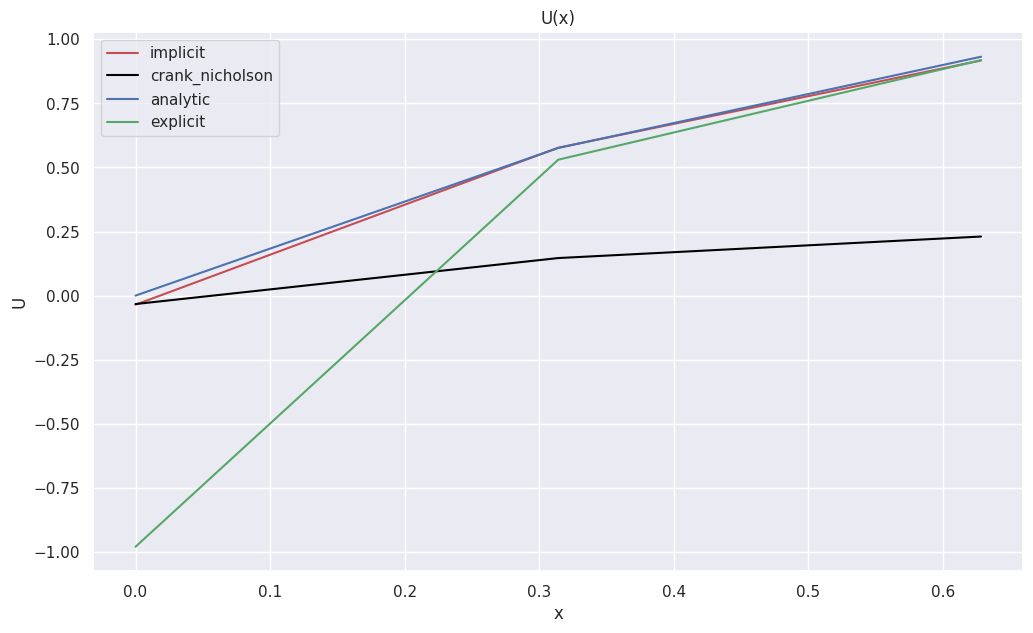

In [73]:
plot_U_x(lines, N)

График ошибки от времени

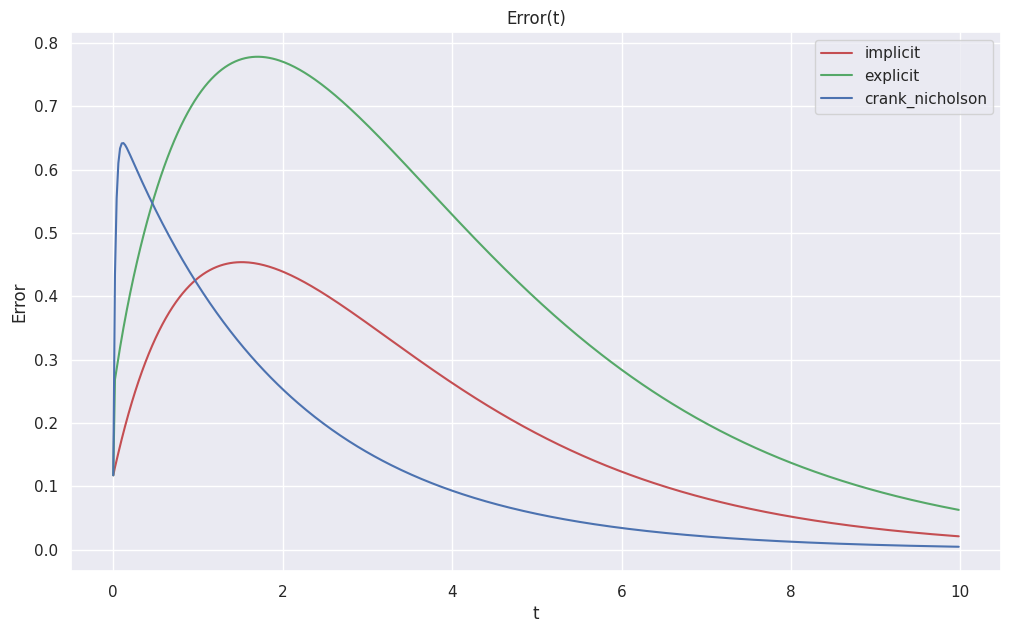

In [74]:
def plot_error_time(lines, num_intervals, total_time):
    plt.figure(figsize=(12, 7))
    time_values = np.arange(0, total_time, total_time / num_intervals)

    colors = ['r', 'g', 'b']
    plt.title('Error(t)')
    for method, color in zip(algorithms, colors):
        sns.lineplot(x=time_values, y=calculate_error(lines[method], lines['analytic']), label=method, color=color)
    plt.legend(loc='best')
    plt.ylabel('Error')
    plt.xlabel('t')
    plt.grid(True)
    plt.show()

sns.set_style("darkgrid")
plot_error_time(lines, K, T)